<a href="https://colab.research.google.com/github/jinny520/22JG/blob/main/7_%EA%B8%B0%EC%98%A8%EB%8D%B0%EC%9D%B4%ED%84%B0_2050%EB%85%84_%EC%9A%B0%EB%A6%AC_%EB%8F%99%EB%84%A4%EC%9D%98_%EA%B8%B0%EC%98%A8_%EB%B3%80%ED%99%94%EB%8A%94%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공지능이란? 
 : 인간의 지능을 인공적으로 모방하는 총체

 <img src='https://miro.medium.com/max/1000/0*lOPl0881zcdhdHnl.png' width=700>



> 인공지능(Artificial Intelligence)

: 가장 오래된 개념으로 인간의 지능을 컴퓨터 프로그램으로 구현해 인공적인 지능을 갖춘 컴퓨터 시스템이다.

  * Q. 인공지능의 사례 ? 계산 기능을 모방한 계산기, 일정관리 앱, 
  * 또 다른 인공지능의 사례를 생각해봅시다

> 머신러닝 (Machine Learning)

: 말 그대로 기계(Machine)가 스스로 학습(Learning)을 하는 것으로 인간이 직접 지시를(프로그래밍) 하는 것이 아니고, 데이터와 원하는 결과 값을 주면 스스로 학습하여 조건을 찾는 것이다. 인간이 컴퓨터를 다루는 근본적인 개념을 바꾸었다는 측면에서 큰 의미를 지닌다.

<img src='https://i0.wp.com/vinodsblog.com/wp-content/uploads/2018/11/Classification-vs-Regression.png?fit=2048%2C1158&ssl=1' width=600>

--> [기존 프로그래밍과 인공지능의 차이](https://youtu.be/ZY6eBxyEOq0)


>지도학습, 비지도학습

<img src='https://nohjiho.github.io/images/ml/tensorflow/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%9C%A0%ED%98%95.png' width=1000>

# 0. 들어가기 전에, 한글 폰트 설정해주기

#### 코랩에서 한글 폰트 설정
1) 한글 폰트 코드 실행 

```
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
```

2) 런타임 - 런타임 다시시작 

3) 글꼴 지정 명령어 

```
plt.rc('font', family='NanumGothic')
```



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!git clone https://github.com/jinny520/22JG

In [ ]:
cd 22JG

In [ ]:
ls

In [ ]:
# pandas : 데이터 분석 라이브러리 
# dataframe: 2차원 표 구조를 가지는 자료형이다. pandas의 주요 데이터 유형 중 하나.
import pandas as pd
df = pd.read_csv('seoultemp(year,2021).csv')
df

In [ ]:
# 데이터 알아보기
df.info()

In [ ]:
# 데이터 통계적 특성 알아보기
df.describe()

In [ ]:
# 비어있는 데이터(NaN) 처리하기
# df = df.dropna()
df = df.fillna(method='bfill')
# df 데이터의 정보 알아보기
df.info()

In [ ]:
# 연도, 평균기온 데이터 저장하기
year = df['년'].values
temp = df['평균기온(℃)'].values

In [ ]:
# 꺾은선 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(year, temp)
plt.show()

In [ ]:
# 산점도(scatter) 그리기
import matplotlib.pyplot as plt
plt.scatter(year,temp)
plt.show()

In [ ]:
# 학습에 필요한 형태로 데이터 모양 가공하기
# numpy : numeric python, 주로 선형대수학 등에 활용
import numpy as np
year = np.reshape(year,(-1,1))
temp = np.reshape(temp,(-1,1))

In [ ]:
# 머신러닝 모델이 원하는 모양이 x행 1열 형태여서 이렇게 변환!
year

# 3. 선형 회귀 모델 학습 

In [ ]:
# sklearn : scikit-learn, 파이썬에서 머신러닝에 가장 많이 사용되는 라이브러리
from sklearn.linear_model import LinearRegression
# 선형 회귀 모델 학습(fit) - 한 줄로 끝
model = LinearRegression().fit(year, temp)

In [ ]:
# 직선의 기울기와 절편 확인
model.coef_, model.intercept_

### 4. 최근 50년 전후의 데이터로 학습하면 결과가 어떻게 바뀔까?!

In [ ]:
# 1907년부터 1970년까지의 데이터로 학습하기
model2 = LinearRegression().fit(year[:-50], temp[:-50])

In [ ]:
model2.coef_, model2.intercept_

In [ ]:
# 1971년부터 최근 50년간 데이터로 학습하기
model3 = LinearRegression().fit(year[-50:], temp[-50:])

In [ ]:
model3.coef_, model3.intercept_

### 5. 서울의 2050년까지 기온 예측해보기

In [ ]:
# 전체적으로 예측하기
year1907 = np.arange(1907,2051).reshape(-1,1)
pred1 = model.predict(year1907)

In [ ]:
# 전체적으로 예측한 결과
pred1

In [ ]:
before1971 = np.arange(1907,1971).reshape(-1,1)
pred2 = model2.predict(before1971)

In [ ]:
after1971 = np.arange(1971,2051).reshape(-1,1)
pred3 = model3.predict(after1971)

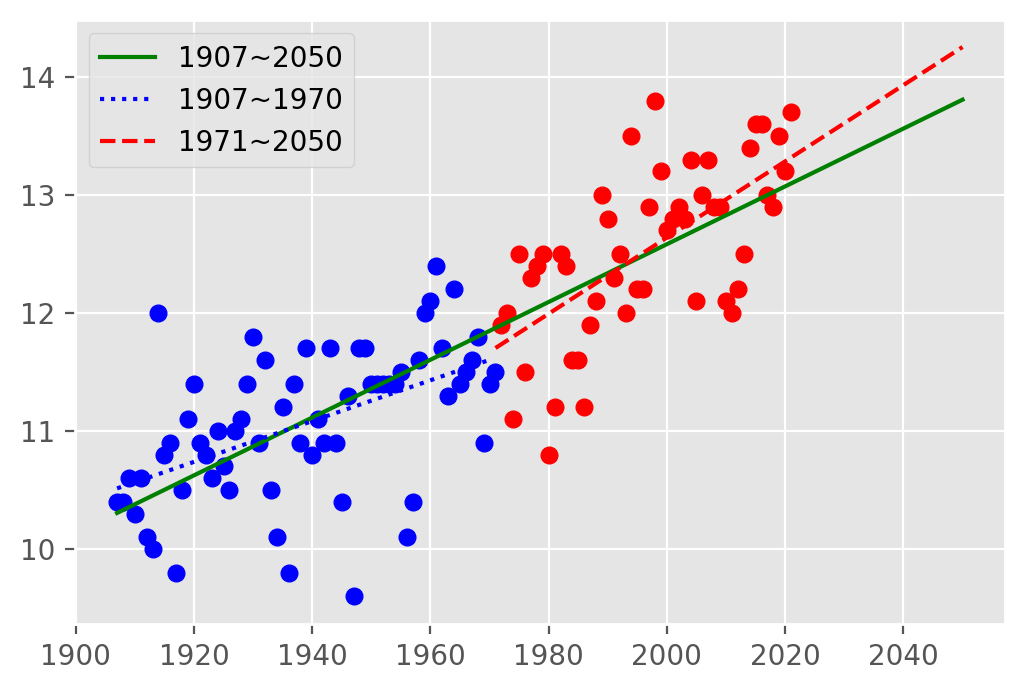

In [ ]:
# 원본 그래프와 선형 회귀로 예측한 그래프 각각 그리기
import matplotlib.pyplot as plt
plt.figure(dpi = 200)
plt.style.use('ggplot')
plt.scatter(year[:-50], temp[:-50], color = 'b')
plt.scatter(year[-50:], temp[-50:], color = 'r')
plt.plot(year1907, pred1, 'g', label = '1907~2050')
plt.plot(before1971, pred2, 'b:', label = '1907~1970')
plt.plot(after1971, pred3, 'r--', label = '1971~2050')
plt.legend()
plt.show()